# **Supply Chain Disruption Forecaster**
## *A basic machine learning model in Python to forecast supply chain disruptions using time series data and anomaly detection. We will use real-world economic and weather data to predict potential risks.*

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load synthetic supply chain data (replace with real dataset)

In [24]:
data = pd.read_csv("supply_chain_data.csv", parse_dates=["date"], index_col="date")
data = data.asfreq('M')


# Visualize the dataset

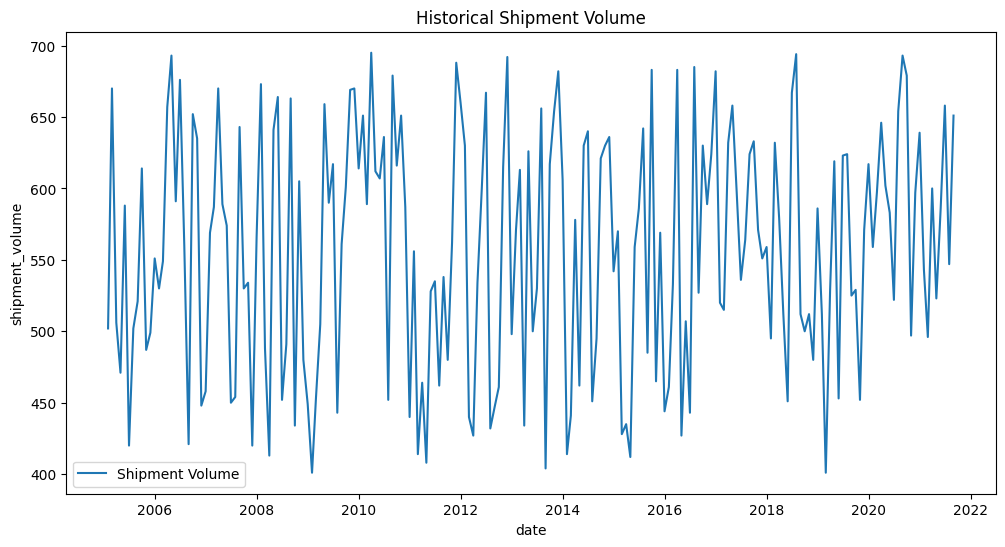

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data.index, y=data["shipment_volume"], label="Shipment Volume")
plt.title("Historical Shipment Volume")
plt.legend()
plt.show()

# Normalize the data for ML models

In [26]:
scaler = MinMaxScaler()
data[["shipment_volume", "weather_disruptions", "economic_index"]] = scaler.fit_transform(
    data[["shipment_volume", "weather_disruptions", "economic_index"]]
)

# Time Series Forecasting using Exponential Smoothing

In [27]:
model = ExponentialSmoothing(data["shipment_volume"], trend="add", seasonal="add", seasonal_periods=12)
forecast_model = model.fit()
forecast = forecast_model.forecast(steps=12)


# Plot Forecast

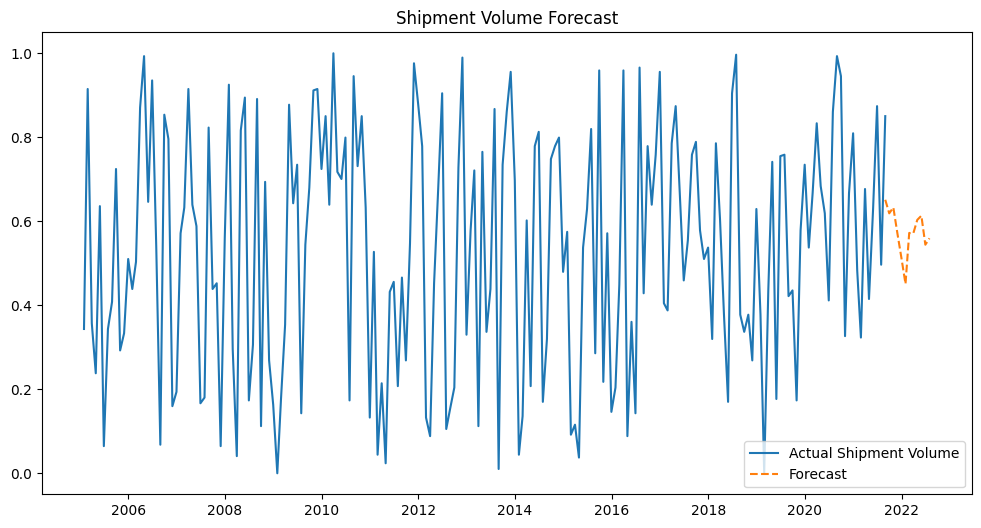

In [28]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data["shipment_volume"], label="Actual Shipment Volume")
plt.plot(pd.date_range(start=data.index[-1], periods=12, freq='M'), forecast, label="Forecast", linestyle='dashed')
plt.title("Shipment Volume Forecast")
plt.legend()
plt.show()

# Anomaly Detection using Isolation Forest

In [29]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data["anomaly_score"] = iso_forest.fit_predict(data[["shipment_volume", "weather_disruptions", "economic_index"]])

# Visualize anomalies

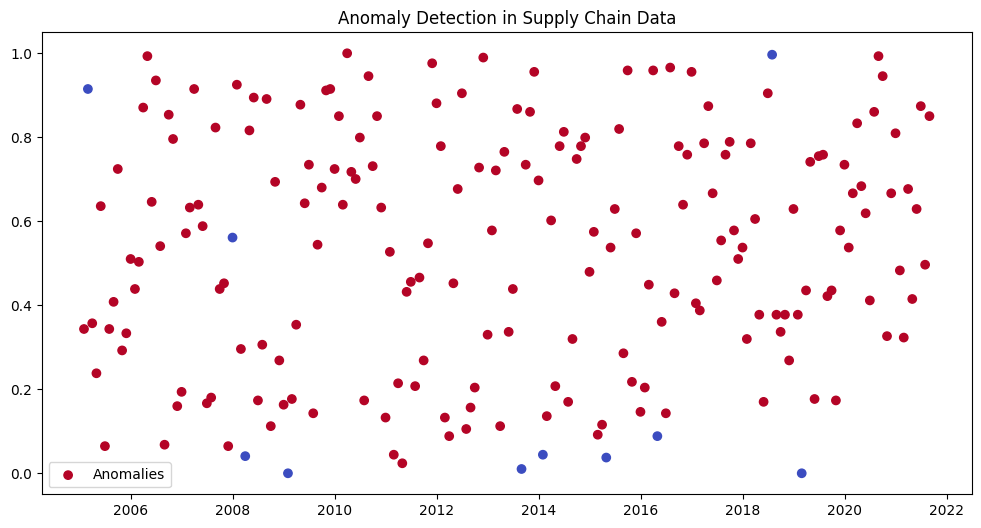

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(data.index, data["shipment_volume"], c=data["anomaly_score"], cmap="coolwarm", label="Anomalies")
plt.title("Anomaly Detection in Supply Chain Data")
plt.legend()
plt.show()


# Save processed data

In [31]:
data.to_csv("processed_supply_chain_data.csv")

print("Model Training and Forecasting Completed!")

Model Training and Forecasting Completed!
